# Teste da estratégia de *Data Augmentation*

## Importação das biliotecas

- TensorFlow: biblioteca para processamento de dados e contrução de CNN
- Matplot: biblioteca de para geração de imagens gráficas

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

## Carregamento da imagem e criação do dataset

- `IMAGE_PATH`: caminho da imagem no sistema de arquivos
- `load_img`: carrega a imagem já no tamanho de treinamento (224X224 pixels)
- `img_to_array`: transforma a imagem em um tensor
- `image / 255.0`: normaliza os pixels de valores entre 0-255 (padrão de imagens) para 0-1 (padrão treinamento)
- `expand_dims`: adiociona uma dimensão de batch, uma vez que o modelo espera várias imagens
- `repeat`: repete a mesma imagem 9 vezes

In [2]:
IMAGE_PATH = "../data/train/NORMAL/IM-0115-0001.jpeg"

image = tf.keras.utils.load_img(IMAGE_PATH, target_size=(224, 224))

image = tf.keras.utils.img_to_array(image)

image = image / 255.0

image = tf.expand_dims(image, axis=0)

image_batch = tf.repeat(image, repeats=9, axis=0)

## Denfinindo padrões e aplicando aumentação

- `RandomFlip`: inverte a imagem na horizontal aleatoriamente
- `RandomRotation`: gira a imagem aleatoriamente (0.1 equivale a até 10% da circunferência aprox. 36 graus)
- `RandomZoom`: amplia ou reduz a imagem aleatoriamente (0.2 equivale a até 20% do tamanho da imagem)

In [3]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.2),
    ]
)

augmented_image = data_augmentation(image_batch, training=True)

## Plota as imagens após passarem pela aumentação de dados

- `plt.figure`: define uma imagem e controla o tamanho que ela vai aparecer na tela
- `plt.subplot`: define que será uma grade com 3X3 sub-imagens e o índice da sub-imagem (que muda a cada interação)
- `plt.imshow`: mostra a sub-imagem
- `plt.axis`:  deixa a visualização mais limpa (sem régua na imagem)

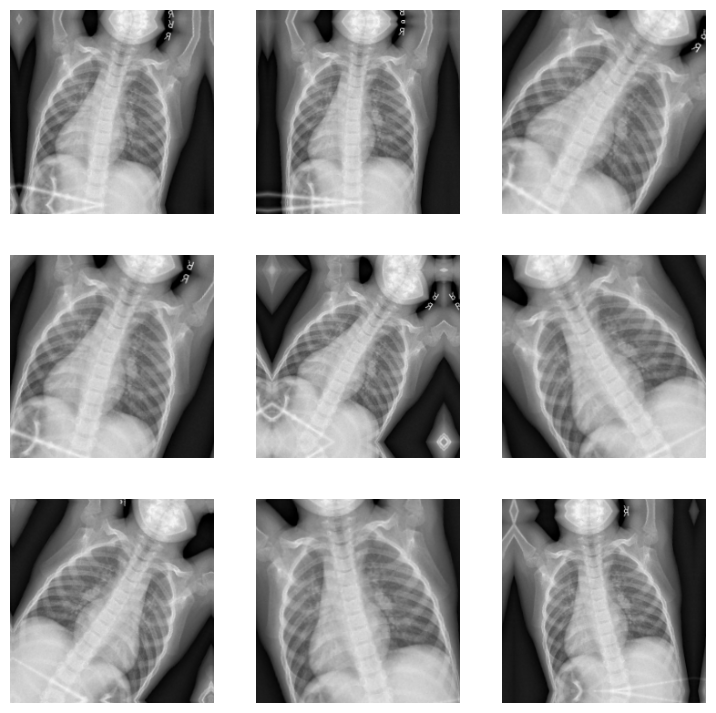

In [4]:
plt.figure(figsize=(9, 9))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[i])
    plt.axis("off")